In this recipe we'll explore some of the functionality that can be applied to an alignment of protein sequences. We're going to start with a multiple sequence alignment (MSA) of myoglobin sequences from 42 diverse tetrapods, and one human hemoglobin sequence. This multiple sequence alignment was generated by following the steps in the [Progressive Multiple Sequence Alignment recipe](./Progressive%20multiple%20sequence%20alignment.ipynb).

Myoglobin was the first protein sequence to have its stucture determined by x-ray crystallography. For some background on this molecule, see the [myoglobin article in the PDB *Molecule of the Month* series](http://www.rcsb.org/pdb/101/motm.do?momID=1).

First, we'll prepare our environment and load our myoglobin alignment into a [``TabularMSA``](http://scikit-bio.org/docs/0.5.0/generated/skbio.alignment.TabularMSA.html) object, setting the MSA's index labels to the sequence identifiers read in from the FASTA file.

In [1]:
%matplotlib inline

from skbio import TabularMSA, Protein

msa = TabularMSA.read('data/globin-aln.fasta', constructor=Protein)
msa.reassign_index(minter='id')

## Exploring a sequence alignment

We can next get some information about this alignment. For example, we can easily see that there are 43 sequences in this alignment, and that it's 154 characters long. By definition, there is no variance in sequence length in a multiple sequence alignment. For this reason, it's common to think of an alignment as a matrix or table, where rows represent sequences and columns represent positions in the sequences.

In [2]:
msa

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 43
    position count: 154
-----------------------------------------------------------------------
VHLTPEEKSAVTALWGKVNVDEV--GGEALGRL ... KEFTPPVQAAYQKVVAGVANALAHKYH------
-GLSDGEWQLVLKVWGKVEGDLPGHGQEVLIRL ... ADFGADAQAAMGKALELFRNDMAAKYKEFGFQG
...
-GLSDDEWNHVLGIWAKVEPDLSAHGQEVIIRL ... SDFGADSQAAMKKALELFRNDMASKYKEFGFQG
-GLSDDEWHHVLGIWAKVEPDLSAHGQEVIIRL ... SDFGADSQAAMRKALELFRNDMASKYKEFGFQG

There are also some mechanisms in place to get more direct access to this information. For example:

In [3]:
msa.shape

Shape(sequence=43, position=154)

The index in this alignment (which was set to the sequence identifiers above) contains the genus and species that each sequence is derived from:

In [4]:
for label in msa.index:
    print(label)

hemoglobin-human
Ornithorhynchus.anatinus-platypus
Tachyglossus.aculeatus-short.beaked.echidna
Macropus.rufus-red.kangaroo
Castor.fiber-eurasian.beaver
Ondatra.zibethicus-muskrat
Kogia.breviceps-pygmy.sperm.whale
Physeter.catodon-sperm.whale
Ziphius.cavirostris-beaked.whale
Orcinus.orca-killer.whale
Phocoenoides.dalli.dalli-porpoise
Balaenoptera.physalus-fin-whale
Inia.geoffrensis-amazon.river.dolphin
Canis.lupus.familiaris.dog
Bos.taurus-cattle
Ovis.aries-sheep
Elephas.maximus-asian.elephant
Equus.caballus-horse
Mus.musculus-mouse
Zalophus.californianus-california.sea.lion
Orycteropus.afer-aardvark
Ctenodactylus.gundi-common.gundi
Tupaia.chinensis-treeshrew
Lagostomus.maximus-viscacha
Proechimys.guairae-guaira.spiny.rat
Ochotona.princeps-american.pika
Nannospalax.ehrenbergi-blind.mole.rat
Lutra.lutra-otter
Meles.meles-badger
Didelphis.virginiana-opossum
Callithrix.jacchus-marmoset
Lagothrix.lagotricha-brown.woolly.monkey
Saimiri.sciureus-common.squirrel.monkey
Rousettus.aegyptiacus-eg

We can also explore some more interesting features of this alignment. For example, we can compute conservation for each position in the alignment using the *inverse Shannon uncertainty* metric. In this case, we're going to treat gap characters as another *character* in the amino acid alphabet, though the right way to handle gaps in alignments when computing conservation is debatable. To learn more about positional conservation, see [``TabularMSA.conservation``](http://scikit-bio.org/docs/0.5.0/generated/skbio.alignment.TabularMSA.conservation.html).

In [5]:
positional_conservation = msa.conservation(metric='inverse_shannon_uncertainty', degenerate_mode='nan', gap_mode='include')

We get an array of positional conservation values (here we'll just print the first ten). A low conservation value means that there is a lot of variation in the sequences at the corresponding position in the alignment, while a high conservation value means that the corresponding position in the alignment is highly conserved. A conservation of 1.0 means that a position is perfectly conserved. A conservation of 0.0 means that every character in the alphabet is present in exactly equal frequency at that position in the alignment (this is uncommon in practice).

In [6]:
for value in positional_conservation[:10]:
    print(value)

0.963720731598
0.845643534756
1.0
0.902301609936
0.862825292185
0.717505677906
1.0
0.963720731598
0.77120683716
0.730788546142


In our alignment, there are exactly 21 positions that are perfectly conserved across all sequences. This is pretty astonishing, particularly because there is a hemoglobin sequence in the alignment. This means that (based on the information we have here) these positions have not changed since the last common ancestor of the hemoglobin/myoglobin <a href="http://en.wikipedia.org/wiki/Homology_(biology)#Paralogy">paralogs</a>). 

In [7]:
(positional_conservation == 1.0).sum()

21

Let's figure out what amino acids are at these perfectly conserved positions:

In [8]:
for pos_idx, conservation in enumerate(positional_conservation):
    if conservation == 1.0:
        # find the amino acid at this position in the first sequence in the alignment
        aa = msa[0][pos_idx]
        print("Position %3d is perfectly conserved, containing %s in all sequences." % (pos_idx, aa))

Position   2 is perfectly conserved, containing L in all sequences.
Position   6 is perfectly conserved, containing E in all sequences.
Position  10 is perfectly conserved, containing V in all sequences.
Position  14 is perfectly conserved, containing W in all sequences.
Position  16 is perfectly conserved, containing K in all sequences.
Position  17 is perfectly conserved, containing V in all sequences.
Position  25 is perfectly conserved, containing G in all sequences.
Position  37 is perfectly conserved, containing P in all sequences.
Position  39 is perfectly conserved, containing T in all sequences.
Position  43 is perfectly conserved, containing F in all sequences.
Position  46 is perfectly conserved, containing F in all sequences.
Position  62 is perfectly conserved, containing K in all sequences.
Position  65 is perfectly conserved, containing G in all sequences.
Position  68 is perfectly conserved, containing V in all sequences.
Position  76 is perfectly conserved, containing 

Finally we can visualize the conservation along the full length of the alignment to get an idea of where the more and less conserved positions are found. In general, positions that are highly conserved are thought to have specific structural or functional roles in the protein, while positions that are less conserved might have less specific roles (e.g., providing a filler between two functional domains in the linear protein backbone).

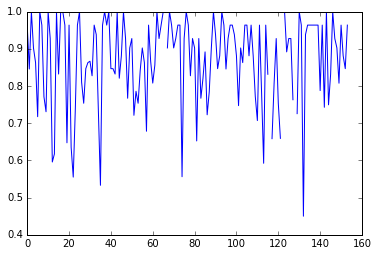

In [9]:
from pylab import figure

fig = figure()
ax = fig.add_subplot(111)
_ = ax.plot(range(len(positional_conservation)), positional_conservation, '-')

## Building a neighbor joining tree

A common reason for building a multiple sequence alignment is for making an inference about the evolutionary relationships between the organisms. We'll do this here using the neighbor joining ([``skbio.tree.nj``](http://scikit-bio.org/docs/0.5.0/generated/skbio.tree.nj.html)) function in scikit-bio.

The input to ``nj`` is a distance matrix, representing the pairwise distances between the sequences in the alignment. This can be obtained using ``DistanceMatrix.from_iterable``. Here we'll compute the Hamming distances between all pairs of sequences in the alignment:

In [10]:
from skbio import DistanceMatrix
from skbio.sequence.distance import hamming

dm = DistanceMatrix.from_iterable(msa, metric=hamming, keys=msa.index)
print(dm)

43x43 distance matrix
IDs:
'hemoglobin-human', 'Ornithorhynchus.anatinus-platypus', ...
Data:
[[ 0.          0.73376623  0.74025974 ...,  0.71428571  0.70779221
   0.70779221]
 [ 0.73376623  0.          0.05844156 ...,  0.24025974  0.30519481
   0.2987013 ]
 [ 0.74025974  0.05844156  0.         ...,  0.24675325  0.31818182
   0.31168831]
 ..., 
 [ 0.71428571  0.24025974  0.24675325 ...,  0.          0.24025974
   0.25324675]
 [ 0.70779221  0.30519481  0.31818182 ...,  0.24025974  0.          0.05194805]
 [ 0.70779221  0.2987013   0.31168831 ...,  0.25324675  0.05194805  0.        ]]


One initial observation that we can make here is that the mean of the distribution of distances between the hemoglobin sequence and all other sequences is higher than the mean of the distribution of the chimpanzee myoglobin sequences to all of the others. This is exactly what we expect since the hemoglobin sequence diverged from the myoglobin sequences longer ago.

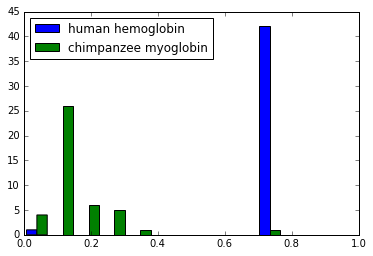

In [11]:
fig = figure()
ax = fig.add_subplot(111)
ax.hist([dm['hemoglobin-human'], dm['Pan.troglodytes-chimpanzee']], label=['human hemoglobin', 'chimpanzee myoglobin'])
ax.set_xlim((0,1))
ax.legend(loc='upper left')

We can now build a neighbor-joining tree from this distance matrix:

In [12]:
from skbio.tree import nj
tree = nj(dm)

We can visualize this tree with the [ETE Toolkit](http://etetoolkit.org/):

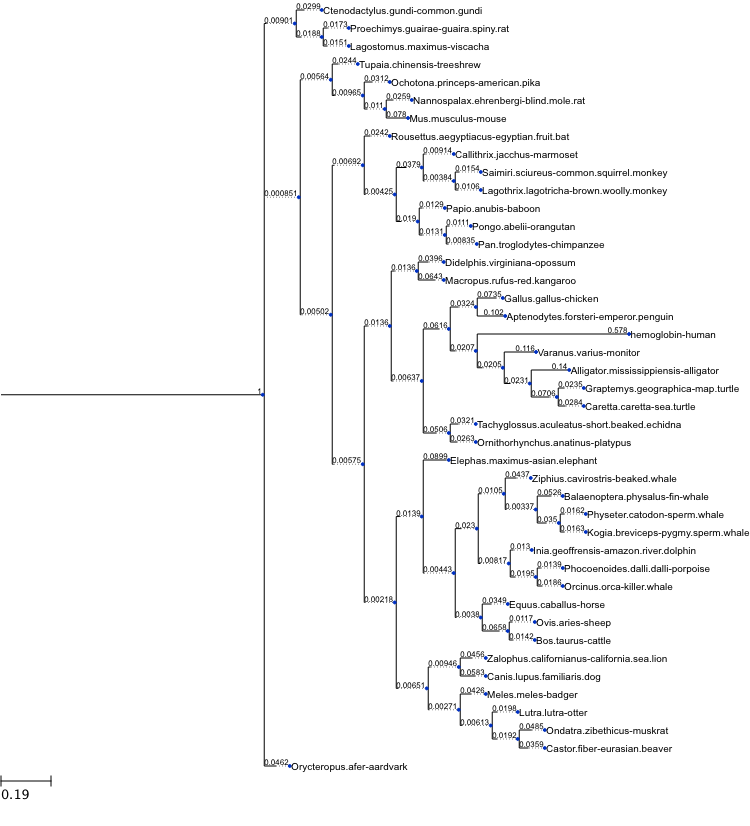

In [13]:
import ete3
ts = ete3.TreeStyle()
ts.show_branch_length = True
ete3.TreeNode.from_skbio(tree).render("%%inline", tree_style=ts)

To get a better understanding of the evolutionary history, we can use outgroup rooting to place a root in the tree. When doing outgroup rooting, you want to find the tip corresponding to the most distantly related sequence in the alignment, and look at its most recent ancestral node. Because we know *a priori* that the hemoglobin sequence is the most distantly related of the sequences in our alignment (because it's not myoglobin, so by definition had to have begun diverging before all of our myoglobin sequences began diverging), you know that its first ancestral node should be the common ancestor of all sequences in the tree.

First we find the node that we want to be the new root.

In [14]:
new_root = tree.find('hemoglobin-human').ancestors()[0]

And then we build a new tree rooted at this node:

In [15]:
rooted_tree = tree.root_at(new_root)

Visualizing the tree with ETE, you can see that this actually gives us a pretty good picture of the relationships between the organisms. For example, notice that the deepest splits are the myoglobin versus hemoglobin clades, then the separation of the reptiles, birds, and egg-laying mammals, respectively.

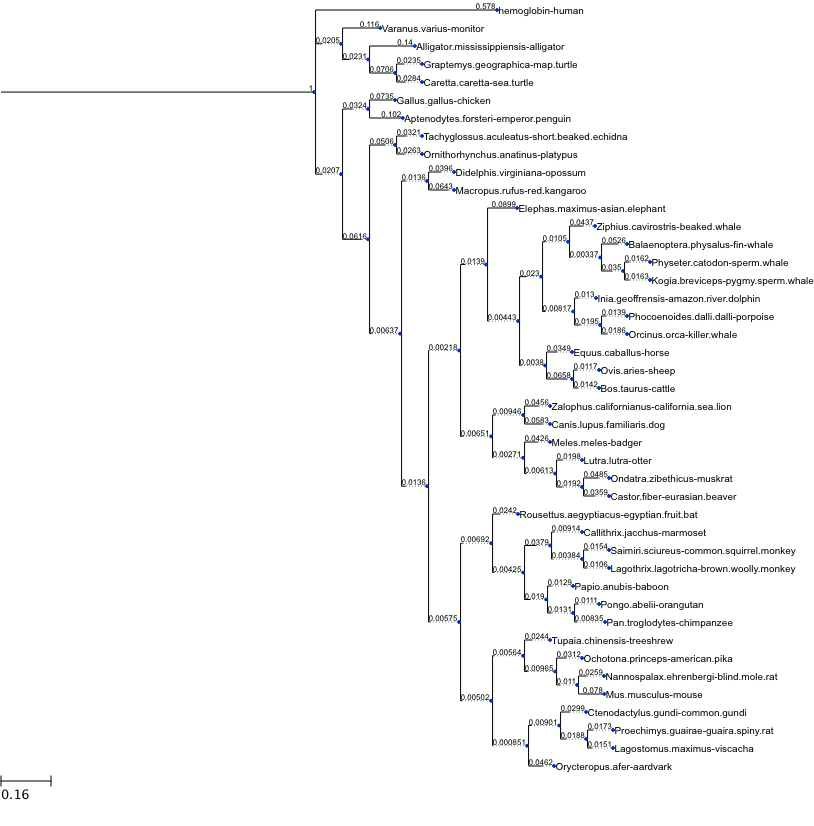

In [16]:
ts = ete3.TreeStyle()
ts.show_branch_length = True
ete3.TreeNode.from_skbio(rooted_tree).render("%%inline", tree_style=ts)